In [199]:
import numpy as np
import pandas as pd

In [200]:
df = pd.read_csv('text.csv')

In [201]:
df.sample(5)

,v1,v2
5107,ham,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...
7551,ham,I'll call you back in a few minutes.
197,ham,is your hamster dead? Hey so tmr i meet you at...
2980,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
6059,spam,Earn money from home without any investment. C...


In [202]:
df.shape

(7572, 2)

In [203]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7572 entries, 0 to 7571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      7572 non-null   object
 1   v2      7572 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


In [205]:
# drop last 3 cols
# df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [206]:
df.sample(5)

,v1,v2
4505,ham,When are you guys leaving?
3116,ham,Now am free call me pa.
3146,ham,Oh thats late! Well have a good night and i wi...
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...
3360,ham,You only hate me. You can call any but you did...


In [207]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
7458,ham,Please let me know your availability for the c...
7568,ham,Please let me know your availability for the c...
3384,ham,Ok can...
5525,ham,I want to tell you how bad I feel that basical...
6880,ham,I really appreciate your help with this project.


In [208]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [209]:
df['target'] = encoder.fit_transform(df['target'])

In [210]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [212]:
# check for duplicate values
df.duplicated().sum()

2394

In [213]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [214]:
df.duplicated().sum()

0

In [215]:
df.shape

(5178, 2)

## 2.EDA

In [216]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [217]:
df['target'].value_counts()

target
0    4526
1     652
Name: count, dtype: int64

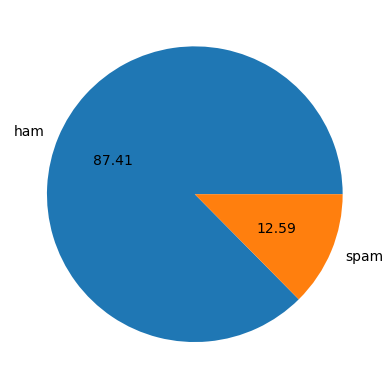

In [218]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [219]:
# Data is imbalanced

In [220]:
import nltk

In [221]:
!pip install nltk

In [222]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rudrashivam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
df['num_characters'] = df['text'].apply(len)

In [224]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [225]:
# num of words
import nltk
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rudrashivam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [226]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [227]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [228]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [229]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5178.000000,5178.000000,5178.000000
mean,78.695829,18.401893,1.960603
std,58.106275,13.309721,1.443546
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [230]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4526.000000,4526.000000,4526.000000
mean,70.385329,17.106938,1.818383
std,56.307757,13.483874,1.382664
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [231]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,136.384969,27.391104,2.947853
std,31.599509,7.238664,1.471818
min,13.000000,2.000000,1.000000
25%,129.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [232]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

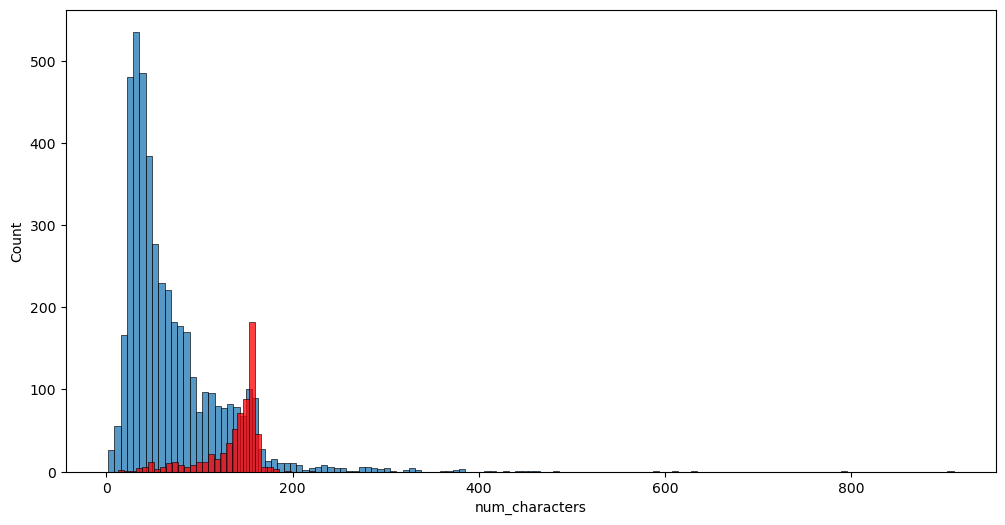

In [233]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

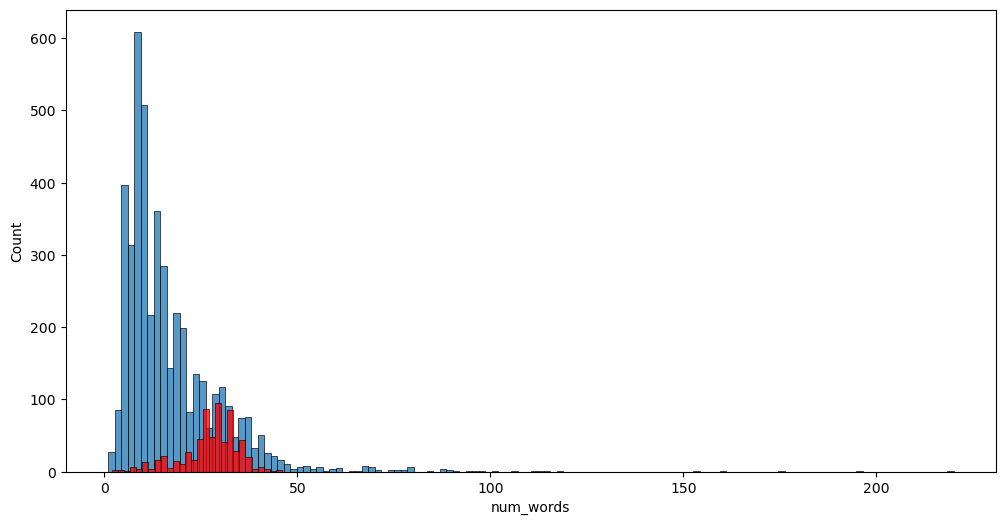

In [234]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

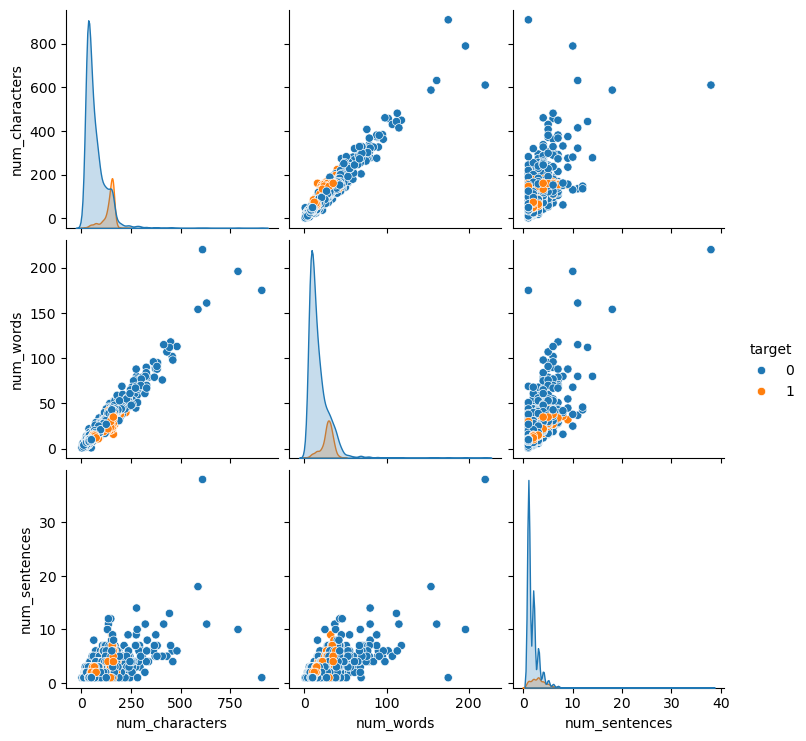

In [235]:
sns.pairplot(df,hue='target')

<Axes: >

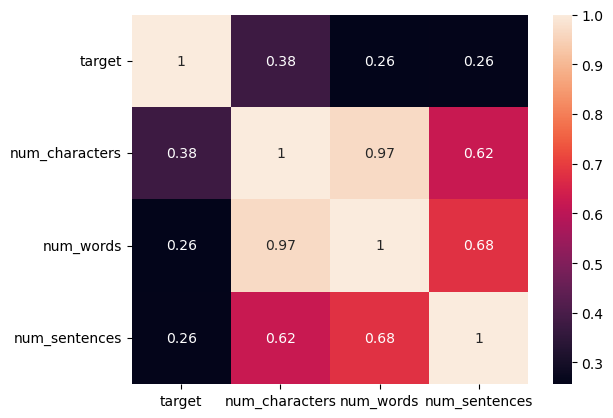

In [236]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [237]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Stem the tokens
    tokens = [ps.stem(token) for token in tokens]
    
    # Return the processed text
    return " ".join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rudrashivam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rudrashivam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_text = transform_text(text)
print("Transformed Text:", transformed_text)


Transformed Text: gon na home soon want talk stuff anymor tonight k cri enough today


In [239]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [240]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [241]:
df['transformed_text'] = df['text'].apply(transform_text)

In [242]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [243]:
from wordcloud import WordCloud
!pip install wordcloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [244]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

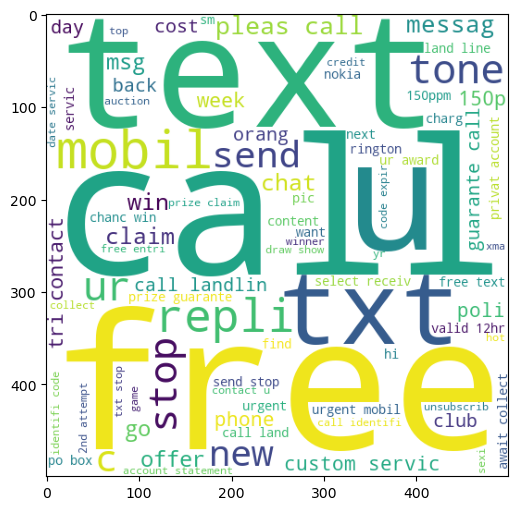

In [245]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [246]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

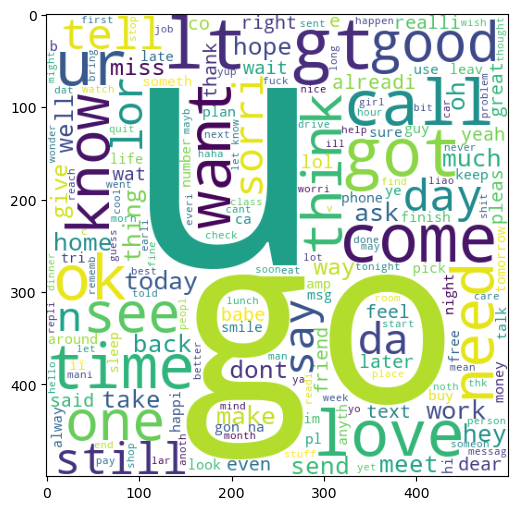

In [247]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [248]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [249]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [250]:
len(spam_corpus)

9826

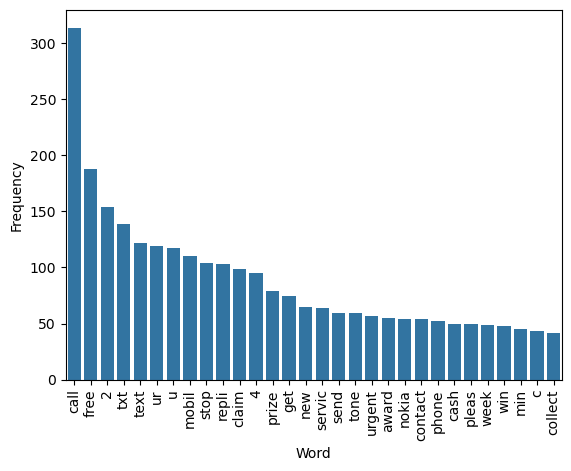

In [251]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the most common 30 words from spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the barplot
sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


In [252]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [253]:
len(ham_corpus)

35444

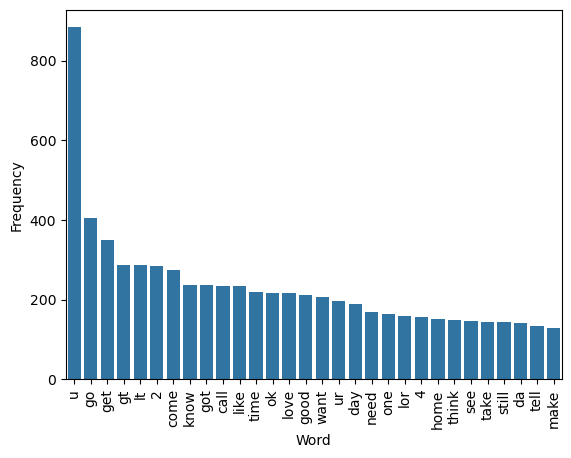

In [254]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the 30 most common words in ham_corpus
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the barplot
sns.barplot(x='Word', y='Frequency', data=common_words)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [255]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [256]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Define TF-IDF vectorizer with max features
tfidf = TfidfVectorizer(max_features=3000)

# Assuming 'df' is your dataframe and 'transformed_text' is a preprocessed column
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Save the vectorizer for later use
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))


In [257]:
#X = tfidf.fit_transform(df['transformed_text']).toarray()

In [258]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [259]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [260]:
X.shape

(5178, 3000)

In [261]:
y = df['target'].values

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [264]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [265]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Example: 'X' contains text data and 'y' contains labels
# X = ["text1", "text2", "text3", ...]
# y = [0, 1, 0, ...]  # Labels (spam = 1, ham = 0)

# Convert text data to numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# GaussianNB does not handle sparse matrices directly, so we need to convert it to a dense matrix
gnb.fit(X_train.toarray(), y_train)

# Predict on test data
y_pred1 = gnb.predict(X_test.toarray())

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Accuracy: 0.9254125412541254
Confusion Matrix:
 [[1054  100]
 [  13  348]]
Precision: 0.7767857142857143


In [267]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9742574257425742
[[1153    1]
 [  38  323]]
0.9969135802469136


In [268]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize the Gaussian Naive Bayes classifier
bnb = GaussianNB()

# Train the model on the dense data
bnb.fit(X_train_dense, y_train)

# Predict on test data
y_pred3 = bnb.predict(X_test_dense)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

# Save the model with pickle
pickle.dump(bnb, open('model.pkl', 'wb'))


Accuracy: 0.9254125412541254
Confusion Matrix:
 [[1054  100]
 [  13  348]]
Precision: 0.7767857142857143


In [269]:
# tfidf --> MNB

In [270]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [271]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [272]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb


# Initialize the classifiers
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='lbfgs', max_iter=1000)  # Adjusted for convergence
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb_classifier = xgb.XGBClassifier()

# Dictionary of classifiers
clfs = {
    'SVC': svc,
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb_classifier
}

# Optionally, check that all classifiers are initialized correctly
for name, clf in clfs.items():
    print(f"{name} initialized: {clf}")


SVC initialized: SVC()
KN initialized: KNeighborsClassifier()
NB initialized: MultinomialNB()
DT initialized: DecisionTreeClassifier()
LR initialized: LogisticRegression(max_iter=1000)
RF initialized: RandomForestClassifier()
AdaBoost initialized: AdaBoostClassifier()
BgC initialized: BaggingClassifier()
ETC initialized: ExtraTreesClassifier()
GBDT initialized: GradientBoostingClassifier()
xgb initialized: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, m

In [273]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [274]:
# Assuming the vectorizer has already been fit and transformed
train_classifier(svc, X_train_tfidf, y_train, X_test_tfidf, y_test)


(0.9848184818481848, 0.9970588235294118)

In [275]:
# Assuming you have already fit and transformed the data using TfidfVectorizer
# Transform text data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Create lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Iterate through classifiers
for name, clf in clfs.items():
    # Train the classifier and get the accuracy and precision
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)
    
    # Print the results for the current classifier
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    # Append the results to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9848184818481848
Precision - 0.9970588235294118
For KN
Accuracy - 0.9313531353135314
Precision - 0.9961389961389961
For NB
Accuracy - 0.9788778877887789
Precision - 0.9969788519637462
For DT
Accuracy - 0.9570957095709571
Precision - 0.9065934065934066
For LR
Accuracy - 0.9755775577557756
Precision - 0.9939024390243902
For RF
Accuracy - 0.9801980198019802
Precision - 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9696369636963696
Precision - 0.9461756373937678
For BgC
Accuracy - 0.9722772277227723
Precision - 0.9623188405797102
For ETC
Accuracy - 0.9848184818481848
Precision - 1.0
For GBDT
Accuracy - 0.968976897689769
Precision - 0.9845679012345679
For xgb
Accuracy - 0.9821782178217822
Precision - 0.9826589595375722


In [276]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [277]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.980198,1.000000
8,ETC,0.984818,1.000000
0,SVC,0.984818,0.997059
2,NB,0.978878,0.996979
1,KN,0.931353,0.996139
4,LR,0.975578,0.993902
9,GBDT,0.968977,0.984568
10,xgb,0.982178,0.982659
7,BgC,0.972277,0.962319
6,AdaBoost,0.969637,0.946176


In [278]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [279]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.980198
1,ETC,Accuracy,0.984818
2,SVC,Accuracy,0.984818
3,NB,Accuracy,0.978878
4,KN,Accuracy,0.931353
5,LR,Accuracy,0.975578
6,GBDT,Accuracy,0.968977
7,xgb,Accuracy,0.982178
8,BgC,Accuracy,0.972277
9,AdaBoost,Accuracy,0.969637


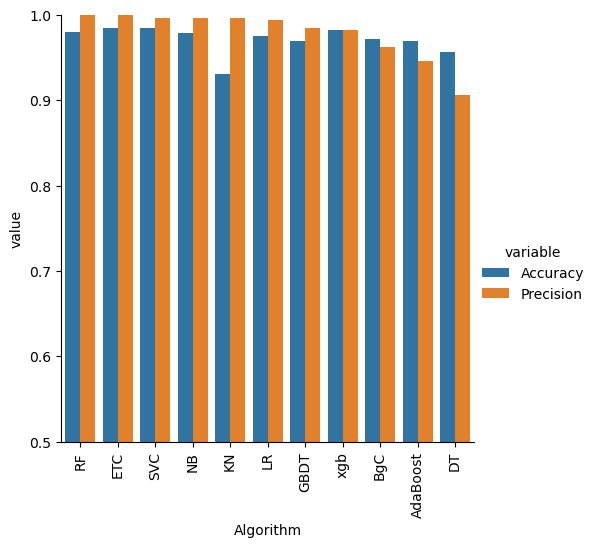

In [280]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [281]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [282]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [283]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [284]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [285]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [286]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [287]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.980198,1.000000,0.980198,1.000000,0.980198,1.000000,0.980198,1.000000
1,ETC,0.984818,1.000000,0.984818,1.000000,0.984818,1.000000,0.984818,1.000000
2,SVC,0.984818,0.997059,0.984818,0.997059,0.984818,0.997059,0.984818,0.997059
3,NB,0.978878,0.996979,0.978878,0.996979,0.978878,0.996979,0.978878,0.996979
4,KN,0.931353,0.996139,0.931353,0.996139,0.931353,0.996139,0.931353,0.996139
5,LR,0.975578,0.993902,0.975578,0.993902,0.975578,0.993902,0.975578,0.993902
6,GBDT,0.968977,0.984568,0.968977,0.984568,0.968977,0.984568,0.968977,0.984568
7,xgb,0.982178,0.982659,0.982178,0.982659,0.982178,0.982659,0.982178,0.982659
8,BgC,0.972277,0.962319,0.972277,0.962319,0.972277,0.962319,0.972277,0.962319
9,AdaBoost,0.969637,0.946176,0.969637,0.946176,0.969637,0.946176,0.969637,0.946176


In [288]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [289]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score

# Initialize the classifiers
svc = SVC(probability=True)
# Ensure 'mnb' and 'etc' are properly defined
# For example:
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier()

# Initialize the VotingClassifier with estimators
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

# Fit the voting classifier
voting.fit(X_train_tfidf, y_train)

# Predict using the voting classifier
y_pred_voting = voting.predict(X_test_tfidf)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))


Accuracy: 0.9881188118811881
Precision: 1.0


In [290]:
# Use the transformed feature set (X_train_tfidf) instead of raw text data
voting.fit(X_train_tfidf, y_train)

# Predict using the voting classifier
y_pred_voting = voting.predict(X_test_tfidf)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))


Accuracy: 0.9887788778877887
Precision: 1.0


In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer (only fit on the training data)
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Ensure same number of features for training and test

# Fit the vectorizer on X_train and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now use the transformed X_test_tfidf for prediction
y_pred = voting.predict(X_test_tfidf)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9887788778877887
Precision: 1.0


In [292]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [293]:
from sklearn.ensemble import StackingClassifier

In [294]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [295]:

# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

# Load dataset
# Ensure the dataset is in the proper format (e.g., a CSV file with 'text' and 'target' columns)
df = pd.read_csv('text.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Preprocessing
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)

# Split data
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# Evaluate the model
y_pred = mnb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9788778877887789
Precision: 0.9969788519637462


In [296]:
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))


In [297]:
# # Evaluate the model on test data
# y_pred = mnb.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
